In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

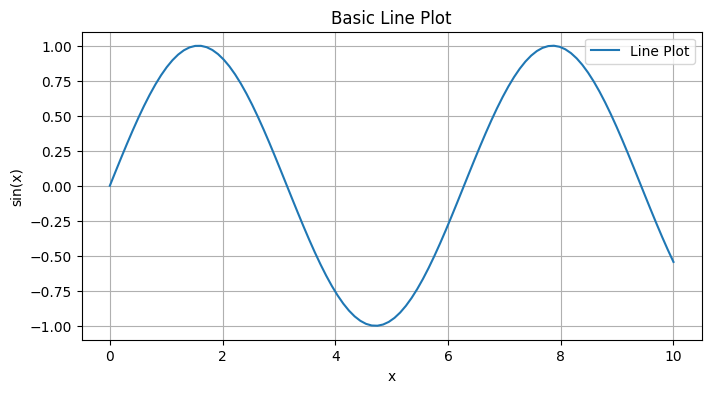

In [55]:
# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Line Plot')
plt.title('Basic Line Plot')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

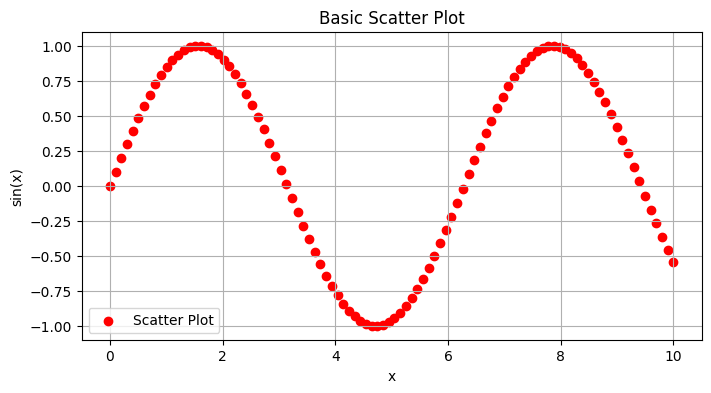

In [56]:
# Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='red', label='Scatter Plot')
plt.title('Basic Scatter Plot')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid()
plt.legend()
plt.show()

In [57]:
# Load the dataset
df = pd.read_csv("Students_Social_Media_Addiction.csv", index_col='Student_ID')
df.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [58]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 1 to 705
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 71.6+ KB


In [59]:
# Data description
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [60]:
# Dataset shape
print("Dataset shape:", df.shape)

Dataset shape: (705, 12)


In [61]:
# Check for missing values
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

wee 5 to 8 in progress

## __Data Visualization__

### __Histogram__ : Visualizing the distribution of a specific column

In [64]:
df.isna().sum() # Total missing values

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

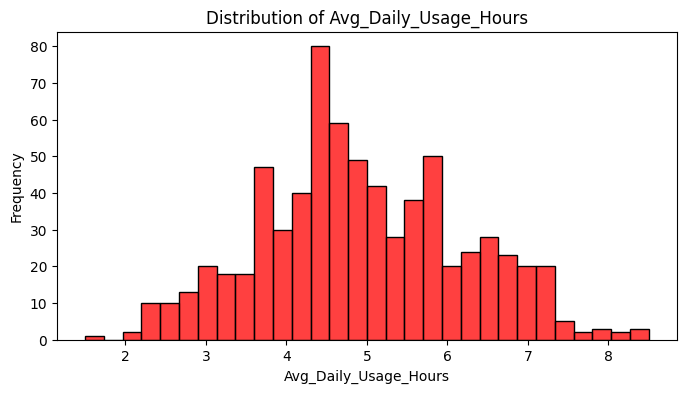

In [71]:
# Visualizing the distribution of a Avg_Daily_Usage_Hours
plt.figure(figsize=(8, 4))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=30, color='red')
plt.title('Distribution of Avg_Daily_Usage_Hours')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Frequency')
plt.show()

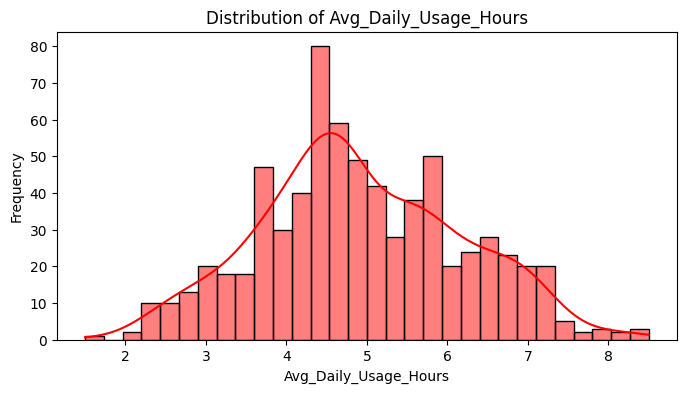

In [72]:
# To depict the nature of the distribution of Avg_Daily_Usage_Hours, set kde=True
plt.figure(figsize=(8, 4))
sns.histplot(df['Avg_Daily_Usage_Hours'], bins=30, color='red', kde=True)
plt.title('Distribution of Avg_Daily_Usage_Hours')
plt.xlabel('Avg_Daily_Usage_Hours')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x400 with 0 Axes>

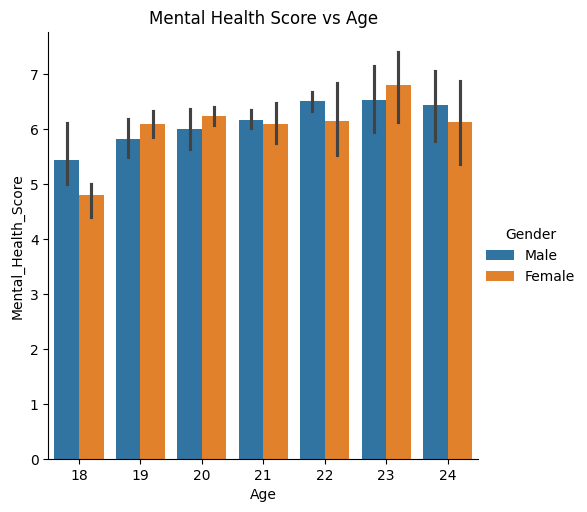

In [84]:
# Visualizing the distribution of a Avg_Daily_Usage_Hours
plt.figure(figsize=(8, 4))
sns.catplot(x= 'Age', y = 'Mental_Health_Score', 
            data=df,  hue='Gender', kind='bar')
plt.title('Mental Health Score vs Age')
plt.xlabel('Age')
plt.ylabel('Mental_Health_Score')
plt.show()